In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
plt.style.use("bmh")

([<matplotlib.axis.XTick at 0x7fe665eaefd0>,
 [Text(0.005454491360845425, 0, '0.0054'),
  Text(0.0062499186216989615, 0, '0.0062'),
  Text(0.0074998593797459025, 0, '0.0074')])

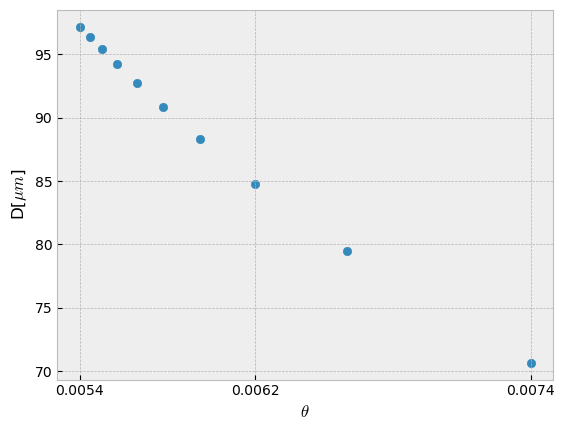

In [51]:
# PELO 1
d_1 = np.array([220, 200, 180, 160, 140, 120, 100, 80, 60, 40])*0.01 #en metros
L_1 = np.array([1.2,1.1,1,0.9,0.8,0.7,0.6,0.5,0.4,0.3])*0.01 #en metros

#Ángulos PELO 1
ang_1 = np.arctan(L_1/d_1)
u = 1/(1 + (L_1/d_1)**2)
err_ang_1 = np.sqrt((u*L_1/d_1**2)**2  *  0.5E-3**2 + (u*1/d_1)**2 *  0.5E-3**2 )

# GROSOR PELO 1
g_1 = 530/np.sin(ang_1) * 0.001 #micrometros
err_g_1 = np.sqrt((1/np.sin(ang_1)*37.5)**2 + (530*np.cos(ang_1)/np.sin(ang_1)**2 * err_ang_1)**2) * 0.001 #micrometros

#Gráfico ángulos vs Distancias
plt.scatter(ang_1, g_1)
plt.ylabel(r"D[$\mu m$]")
plt.xlabel(r"$\theta$")
plt.xticks([ang_1[0], ang_1[7], ang_1[9]], [0.0054, 0.0062, 0.0074])

In [48]:
ang_1

array([0.00545449, 0.00549994, 0.0055555 , 0.00562494, 0.00571422,
       0.00583327, 0.00599993, 0.00624992, 0.00666657, 0.00749986])

Coef de determinación: 0.9912828908010275


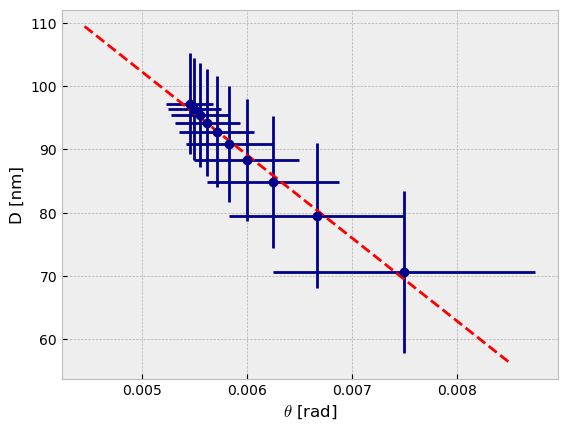

In [25]:
def recta(x,A,B):
    return A*x + B

ajuste_recta_1 = curve_fit(recta, ang_1, g_1)[0]
aa = np.linspace(ang_1.min() - 0.001,ang_1.max() + 0.001,10**3)
def graf_V(A=1,B=1):
    plt.errorbar(ang_1, g_1, xerr= err_ang_1, yerr=err_g_1, fmt = "o", color = "darkblue",ecolor = "darkblue")
    plt.plot(aa, recta(aa, A,B), color="red", ls="--")
    plt.xlabel(r"$\theta$ [rad]")
    plt.ylabel(r"D [nm]")
    plt.grid(True)
    res_1 = g_1 - recta(ang_1, ajuste_recta_1[0], ajuste_recta_1[1])
    st_1 = np.sum((g_1 - np.mean(g_1))**2)
    sr_1 = np.sum(res_1**2)
    r2_1 = (st_1 - sr_1)/st_1
    print("Coef de determinación:",r2_1)
graf_V(ajuste_recta_1[0], ajuste_recta_1[1])

In [56]:
promedio_1 = np.mean(g_1)
err_promedio_1 = np.sqrt(np.sum((err_g_1)**2)) / len(err_g_1)
print("El grosor del pelo 1 en micrómetros es:", promedio_1, "+-", err_promedio_1)

El grosor del pelo 1 en micrómetros es: 89.00755942986535 +- 3.0411979898813706


Text(0.5, 0, '$\\theta$')

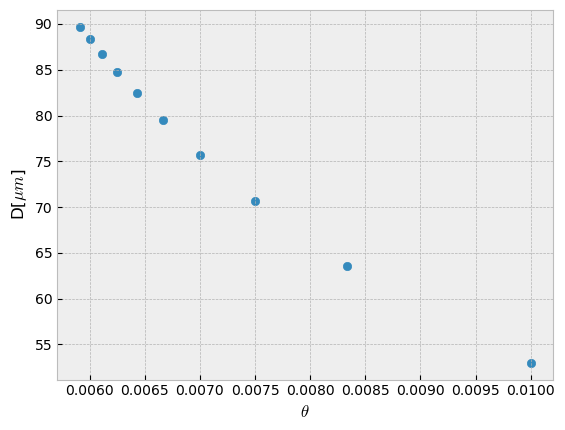

In [52]:
# PELO 2
d_2 = np.array([220, 200, 180, 160, 140, 120, 100, 80, 60, 40])*0.01 #en metros
L_2 = np.array([1.3,1.2,1.1,1,0.9,0.8,0.7,0.6,0.5,0.4])*0.01 #en metros

#Ángulos PELO 1
ang_2 = np.arctan(L_2/d_2)
v = 1/(1 + (L_2/d_2)**2)
err_ang_2 = np.sqrt((v*L_2/d_2**2)**2  *  0.5E-3**2 + (v*1/d_2)**2 *  0.5E-3**2 )

# GROSOR PELO 1
g_2 = 530/np.sin(ang_2) * 0.001 #micrometros
err_g_2 = np.sqrt((1/np.sin(ang_2)*37.5)**2 + (530*np.cos(ang_2)/np.sin(ang_2)**2 * err_ang_2)**2) * 0.001 #micrometros

#Gráfico ángulos vs Distancias
plt.scatter(ang_2, g_2)
plt.ylabel(r"D[$\mu m$]")
plt.xlabel(r"$\theta$")
#plt.xticks([ang_1[0], ang_1[7], ang_1[9]], [0.0054, 0.0062, 0.0074])

In [55]:
promedio_2 = np.mean(g_2)
err_promedio_2 = np.sqrt(np.sum((err_g_2)**2)) / len(err_g_2)
print("El grosor del pelo 2 es micrómetros es:", promedio_2, "+-", err_promedio_2)

El grosor del pelo 2 es micrómetros es: 77.44969130015166 +- 2.3655544011956713
